In [3]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=edd60e1bdf1567b694d3b402125c8496feded277e1b507043bce6558efb99da0
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Data

In [5]:
df = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


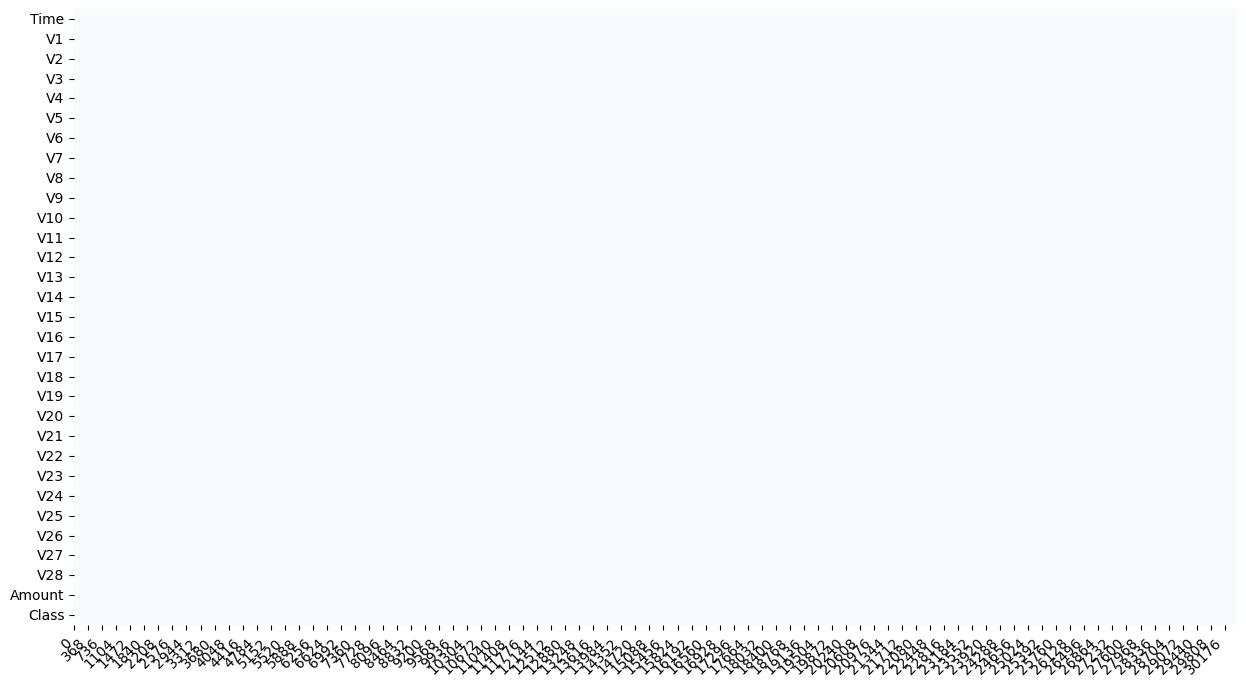

In [6]:
plot_missing_value(df)

# Dataset Splitting

In [7]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape, X_train.shape, y_train.shape

((24393, 30), (6099, 30), (24393, 30), (24393,))

# Training

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns),
])

# Pipeline
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', SVC(max_iter=500))
])

# Parameter Tunning
model = GridSearchCV(svc_pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.9990161111794367 0.9988111343418193 0.9972126578127561


## WOW! 99% test score!!!
Ingat! Setiap kali mendapatkan score setinggi itu,kita harus curiga dan cek kembali:
- Apakah terjadi `data leakage`?
- Apakah datasetnya `imbalance`?
- Apakah memang `problem`nya sesuatu yang `sederhana`

Pada kasus ini, dataset kita sebenarnya **imbalance**

<Axes: xlabel='Class', ylabel='count'>

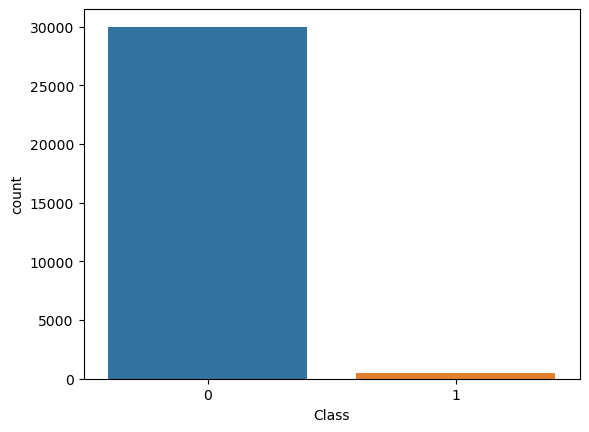

In [11]:
import seaborn as sns

sns.countplot(df, x='Class')

Anggap Semua orang tidak curang dengan total data 30492 sehingga akurasinya yaitu: **98.39%** (baseline terlalu tinggi) sehingga akurasi tidak dapat dijadikan patokan

In [15]:
print(f'{round(30000/30492*100, 2)}%')

98.39%


# Akurasi tidak bisa dipakai untuk imbalance dataset
By default, kita tidak boleh menggunakan akurasi sebagai metrik ketika datanya imbalance. Pakailah `F1-Score`.

Sehingga untuk sekarang gunakan `scoring='F1'`

In [16]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns),
])

# Pipeline
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', SVC(max_iter=500))
])

# Parameter Tunning
model = GridSearchCV(svc_pipeline, gsp.svm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.9686684073107049 0.9624219646510004 0.9050279329608938


## Untuk menambah keyakinan, guanakan Confusion Matrix

In [17]:
from jcopml.plot import plot_confusion_matrix

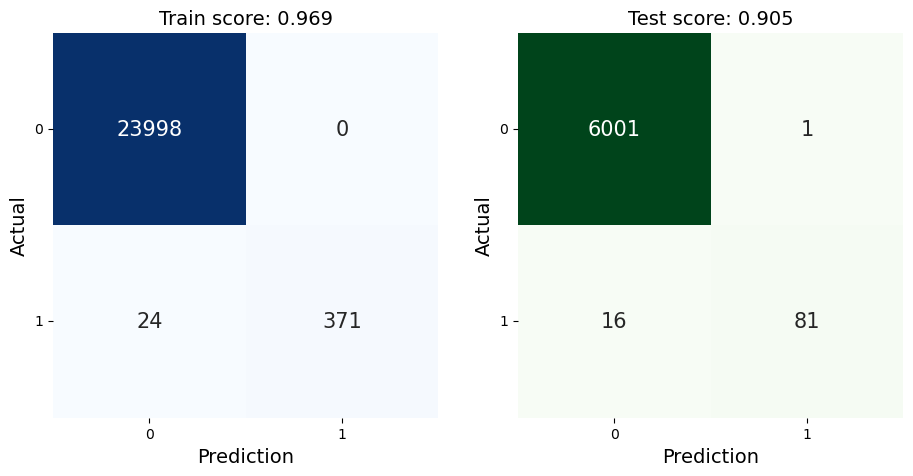

In [18]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

#### Model di atas sudah terbilang bagus untuk `imbalance class`
#### Tetapi kita boleh saja mencoba metode lain, seperti menyeimbangkan class menggunakan `class weight`

# Coba improve pakai `class weight`

In [23]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns),
])

# Pipeline
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', SVC(max_iter=500))
])

svc_params = {
    'algo__gamma': np.logspace(-3,3,7),
    'algo__C': np.logspace(-3,3,7),
    'algo__class_weight': [
        {0: 0.05, 1: 0.95},
        {0: 0.1, 1: 0.9},
        {0: 0.25, 1: 0.75},
    ] # {"nama kelas": bobot}
}

# Parameter Tunning
model = GridSearchCV(svc_pipeline, svc_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 147 candidates, totalling 441 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'algo__C': 1000.0, 'algo__class_weight': {0: 0.25, 1: 0.75}, 'algo__gamma': 0.001}
0.9910828025477708 0.9609262265512265 0.9462365591397849


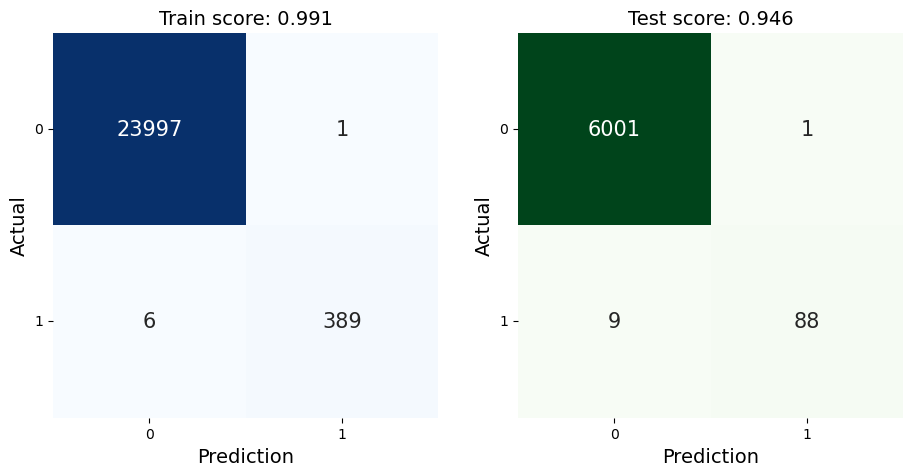

In [24]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)